In [73]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")


TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
TensorFlow version: 2.16.1


In [74]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import pathlib
import random
import os
from PIL import Image

In [75]:
train_images_dir = "train/"  # Update this path to the folder containing your images
category_file = "csv/category.csv"
train_small_file = "csv/train.csv"
output_dir = 'cropped_many2/'
main_directory = "classified_many2/"

In [76]:
# Load category data
category_df = pd.read_csv(category_file)
print(category_df.head())
# Load training set labels
train_df = pd.read_csv(train_small_file)
print(train_df.head())

all_files = os.listdir(train_images_dir)
image_files = [file for file in all_files if file.endswith('.jpg')]
filenames_without_extension = [os.path.splitext(file)[0] for file in image_files]




   Unnamed: 0            Category
0           0          Art Carney
1           1    Akemi Darenogare
2           2  Billy Bob Thornton
3           3          Bill Daley
4           4        Amanda Bynes
   Unnamed: 0 File Name       Category
0           0     0.jpg  Audrey Tautou
1           1     1.jpg   Adam Sandler
2           2     2.jpg    Anna Paquin
3           3     3.jpg    Ava Gardner
4           4     4.jpg      Amy Adams


Category: Andreea Diaconu


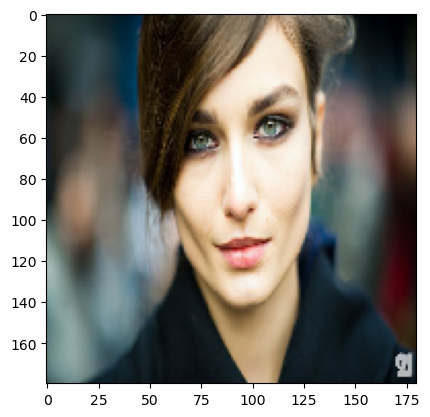

In [77]:
image_filename = "68.jpg"  # Get image filename
image_path = train_images_dir + image_filename  # Construct full image path
image = load_img(image_path, target_size=(180, 180))  # Load image
plt.imshow(image)
# Find the row where the 'File Name' column matches the image filename
matching_row = train_df[train_df['File Name'] == image_filename]

# Extract the category from the matching row
if not matching_row.empty:
    category = matching_row['Category'].iloc[0]
    print("Category:", category)

In [50]:
from PIL import Image
import cv2
import os

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt_tree.xml')

# Directory containing the original images
input_dir = train_images_dir
output_dir = output_dir

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for filename in os.listdir(input_dir):
    # Load the image using PIL
    image_path = os.path.join(input_dir, filename)
    try:
        img = Image.open(image_path)
    except:
        print(f"Error: Unable to load image '{filename}'")
        continue
    
    # Check if the image has the correct number of channels (RGB or RGBA)
    if img.mode != 'RGB':
        img = img.convert('RGB')


    # Convert PIL image to OpenCV format
    img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    # Convert into grayscale
    gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # Check if any faces are detected
    if len(faces) > 0:
        # Take only the first detected face
        x, y, w, h = faces[0]
        # Crop the face
        face = img_cv2[y:y+h, x:x+w]
        # Generate unique output filename
        output_filename = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.jpg")
        # Save the cropped face
        cv2.imwrite(output_filename, face)
    else:
        print(f"No faces detected in '{filename}'")

print("Cropped faces saved successfully.")

No faces detected in '9733.jpg'
No faces detected in '34297.jpg'
No faces detected in '42301.jpg'
No faces detected in '24084.jpg'
No faces detected in '65966.jpg'
No faces detected in '54563.jpg'
No faces detected in '823.jpg'
No faces detected in '35189.jpg'
No faces detected in '44770.jpg'
No faces detected in '36480.jpg'
No faces detected in '28866.jpg'
No faces detected in '16750.jpg'
No faces detected in '50705.jpg'
No faces detected in '26693.jpg'
No faces detected in '37946.jpg'
No faces detected in '3578.jpg'
No faces detected in '58359.jpg'
No faces detected in '16988.jpg'
No faces detected in '59047.jpg'
No faces detected in '69184.jpg'
No faces detected in '49254.jpg'
No faces detected in '46601.jpg'
No faces detected in '10447.jpg'
No faces detected in '59721.jpg'
No faces detected in '30797.jpg'
No faces detected in '2100.jpg'
No faces detected in '11759.jpg'
No faces detected in '40270.jpg'
No faces detected in '31489.jpg'
No faces detected in '4571.jpg'
No faces detecte

/opt/anaconda3/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


No faces detected in '2882.jpg'
No faces detected in '50739.jpg'
No faces detected in '47245.jpg'
No faces detected in '3544.jpg'
No faces detected in '58365.jpg'
No faces detected in '57056.jpg'
No faces detected in '18999.jpg'
No faces detected in '28682.jpg'
No faces detected in '41634.jpg'
No faces detected in '56348.jpg'
No faces detected in '51427.jpg'
No faces detected in '49268.jpg'
No faces detected in '38491.jpg'
No faces detected in '18741.jpg'
No faces detected in '26877.jpg'
No faces detected in '60822.jpg'
No faces detected in '45452.jpg'
No faces detected in '65782.jpg'
No faces detected in '32802.jpg'
No faces detected in '55641.jpg'
No faces detected in '44994.jpg'
No faces detected in '13614.jpg'
No faces detected in '1353.jpg'
No faces detected in '43023.jpg'
No faces detected in '7722.jpg'
No faces detected in '55899.jpg'
No faces detected in '24906.jpg'
No faces detected in '7044.jpg'
No faces detected in '62953.jpg'
No faces detected in '53556.jpg'
No faces detect

/opt/anaconda3/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


No faces detected in '5679.jpg'
No faces detected in '11997.jpg'
No faces detected in '20592.jpg'
No faces detected in '49524.jpg'
No faces detected in '9043.jpg'
No faces detected in '14637.jpg'
No faces detected in '42471.jpg'
No faces detected in '35821.jpg'
No faces detected in '13158.jpg'
No faces detected in '32196.jpg'
No faces detected in '12246.jpg'
No faces detected in '54213.jpg'
No faces detected in '22385.jpg'
No faces detected in '44000.jpg'
No faces detected in '62979.jpg'
No faces detected in '10469.jpg'
No faces detected in '67839.jpg'
No faces detected in '18035.jpg'
No faces detected in '17306.jpg'
No faces detected in '51353.jpg'
No faces detected in '30961.jpg'
No faces detected in '16018.jpg'
No faces detected in '48602.jpg'
No faces detected in '57722.jpg'
No faces detected in '5899.jpg'
No faces detected in '58411.jpg'
No faces detected in '52882.jpg'
No faces detected in '63487.jpg'
No faces detected in '8365.jpg'
No faces detected in '15511.jpg'
No faces detec

In [51]:
import os
import shutil
import pandas as pd


# Read CSV files
category_df = pd.read_csv(category_file)
train_df = pd.read_csv(train_small_file)

# Directory where images are located
image_dir = output_dir 

# Main directory where images will be classified
main_directory = main_directory

# Create main directory if it doesn't exist
if not os.path.exists(main_directory):
    os.makedirs(main_directory)

# Iterate over each row in train_df
for index, row in train_df.iterrows():
    image_filename = row['File Name']
    category_name = row['Category']  # Use category name directly
    
    # Check if the image file exists
    image_path = os.path.join(image_dir, image_filename)
    if not os.path.exists(image_path):
        print(f"Image '{image_filename}' not found.")
        continue
    
    # Create subdirectory if it doesn't exist
    class_directory = os.path.join(main_directory, category_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)
    
    # Copy the image to the appropriate class directory
    dst_image_path = os.path.join(class_directory, image_filename)
    shutil.copy(image_path, dst_image_path)

print("Images classified successfully.")


Image '4.jpg' not found.
Image '10.jpg' not found.
Image '11.jpg' not found.
Image '12.jpg' not found.
Image '14.jpg' not found.
Image '15.jpg' not found.
Image '16.jpg' not found.
Image '17.jpg' not found.
Image '18.jpg' not found.
Image '19.jpg' not found.
Image '20.jpg' not found.
Image '21.jpg' not found.
Image '22.jpg' not found.
Image '23.jpg' not found.
Image '24.jpg' not found.
Image '25.jpg' not found.
Image '26.jpg' not found.
Image '27.jpg' not found.
Image '29.jpg' not found.
Image '30.jpg' not found.
Image '31.jpg' not found.
Image '32.jpg' not found.
Image '33.jpg' not found.
Image '34.jpg' not found.
Image '36.jpg' not found.
Image '37.jpg' not found.
Image '39.jpg' not found.
Image '40.jpg' not found.
Image '42.jpg' not found.
Image '45.jpg' not found.
Image '48.jpg' not found.
Image '49.jpg' not found.
Image '50.jpg' not found.
Image '51.jpg' not found.
Image '52.jpg' not found.
Image '54.jpg' not found.
Image '56.jpg' not found.
Image '57.jpg' not found.
Image '58.jpg

In [78]:
batch_size = 32
img_height = 180
img_width = 180

In [79]:
data_dir=main_directory
# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 61292 files belonging to 100 classes.
Using 49034 files for training.
Found 61292 files belonging to 100 classes.
Using 12258 files for validation.


In [80]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['Aaron Judge', 'Aaron Paul', 'Aaron Taylor-Johnson', 'Abigail Breslin', 'Adam Sandler', 'Adele', 'Adriana Barraza', 'Adriana Lima', 'Adrianne Palicki', 'Adrien Brody', 'Akemi Darenogare', 'Al Pacino', 'Al Roker', 'Alan Alda', 'Alan Arkin', 'Alan Rickman', 'Albert Brooks', 'Albert Finney', 'Alec Baldwin', 'Alessandra Ambrosio', 'Alex Pettyfer', 'Alexander Skarsgard', 'Alexandra Daddario', 'Alexis Thorpe', 'Ali Larter', 'Alice Eve', 'Alicia Vikander', 'Alx James', 'Amanda Bynes', 'Amanda Crew', 'Amanda Peet', 'Amanda Seyfried', 'Amber Heard', 'Amy Adams', 'Amy Ryan', 'Amy Schumer', 'Analeigh Tipton', 'Anderson Cooper', 'Andie MacDowell', 'Andreea Diaconu', 'Andrew Garfield', 'Andrew Lincoln', 'Andrew Luck', 'Andy Garcia', 'Andy Murray', 'Andy Samberg', 'Andy Serkis', 'Angela Bassett', 'Angelina Jolie', 'Anjelica Huston', 'Anna Faris', 'Anna Friel', 'Anna Kendrick', 'Anna Paquin', 'Anna Sui', 'AnnaSophia Robb', 'Anne Bancroft', 'Anne Baxter', 'Anne Hathaway', 'Annette Bening', 'Anthony H

2024-04-03 23:38:34.226683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


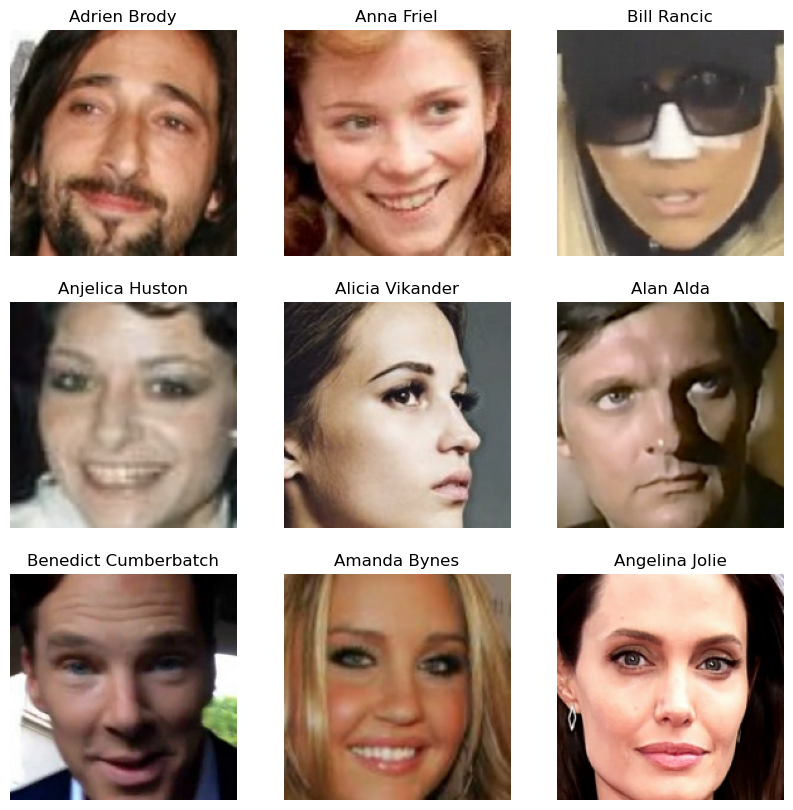

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [82]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [83]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [84]:
normalization_layer = layers.Rescaling(1./255)

In [85]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

2024-04-03 23:39:00.731119: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:139974: Filling up shuffle buffer (this may take a while): 871 of 1000
2024-04-03 23:39:02.102018: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-04-03 23:39:02.167491: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


0.0 0.9598695


In [86]:
num_classes = len(class_names)

model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [87]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001,540 (15.26 MB)

 Trainable params: 4,001,540 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2024-04-03 23:39:19.274540: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:139974: Filling up shuffle buffer (this may take a while): 871 of 1000
2024-04-03 23:39:20.618773: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1533/1533 ━━━━━━━━━━━━━━━━━━━━ 215s 133ms/step - accuracy: 0.0525 - loss: 4.4004 - val_accuracy: 0.2611 - val_loss: 3.4109
Epoch 2/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 198s 129ms/step - accuracy: 0.3517 - loss: 2.9980 - val_accuracy: 0.3967 - val_loss: 2.9136
Epoch 3/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 199s 130ms/step - accuracy: 0.5244 - loss: 2.2129 - val_accuracy: 0.4601 - val_loss: 2.6744
Epoch 4/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 200s 130ms/step - accuracy: 0.6274 - loss: 1.6735 - val_accuracy: 0.4821 - val_loss: 2.7554
Epoch 5/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 200s 130ms/step - accuracy: 0.7263 - loss: 1.2070 - val_accuracy: 0.4939 - val_loss: 2.9701
Epoch 6/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 200s 131ms/step - accuracy: 0.7983 - loss: 0.8646 - val_accuracy: 0.5055 - val_loss: 3.4776
Epoch 7/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 201s 131ms/step - accuracy: 0.8499 - loss: 0.6327 - val_accuracy: 0.5121 - val_loss: 4.2069
Epoch 8/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 199s 130ms/step - accuracy: 0.8

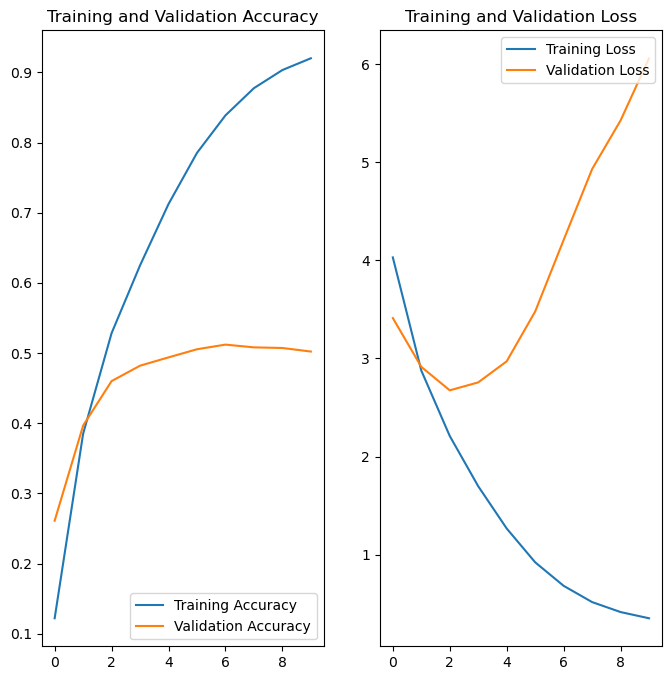

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [91]:
AUTOTUNE = tf.data.AUTOTUNE

# Cache, shuffle, and prefetch train_ds and val_ds
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [92]:
data_augmentation = keras.Sequential(
  [
    layers.Input(shape=(img_height, img_width, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


2024-04-04 00:12:39.741761: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-04 00:12:39.980230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


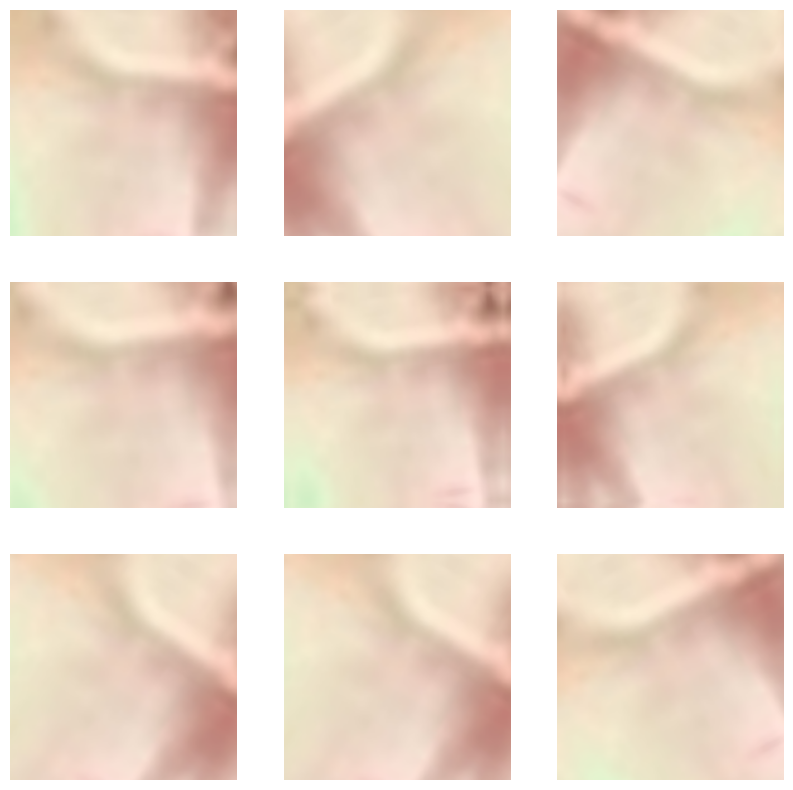

In [93]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [68]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [69]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
from keras.models import Model
from keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the input shape
inputs = Input(shape=(img_height, img_width, 3))

# Data augmentation layer
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Model architecture
x = data_augmentation(inputs)
x = Rescaling(1./255)(x)
x = Conv2D(16, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, name="outputs")(x)

# Define the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_11 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_12 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001,540 (15.26 MB)

 Trainable params: 4,001,540 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
epochs = 60
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/60
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 210s 136ms/step - accuracy: 0.0215 - loss: 4.5485 - val_accuracy: 0.0850 - val_loss: 4.1219
Epoch 2/60
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 212s 138ms/step - accuracy: 0.0962 - loss: 4.0318 - val_accuracy: 0.1646 - val_loss: 3.7291
Epoch 3/60
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 210s 137ms/step - accuracy: 0.1767 - loss: 3.6764 - val_accuracy: 0.2602 - val_loss: 3.4007
Epoch 4/60
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 207s 135ms/step - accuracy: 0.2435 - loss: 3.4146 - val_accuracy: 0.3031 - val_loss: 3.1983
Epoch 5/60
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 207s 135ms/step - accuracy: 0.2900 - loss: 3.2198 - val_accuracy: 0.3523 - val_loss: 3.0527
Epoch 6/60
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 214s 140ms/step - accuracy: 0.3194 - loss: 3.1132 - val_accuracy: 0.3498 - val_loss: 3.0607
Epoch 7/60
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 208s 136ms/step - accuracy: 0.3511 - loss: 2.9833 - val_accuracy: 0.3743 - val_loss: 2.9427
Epoch 8/60
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 207s 135ms/step - ac

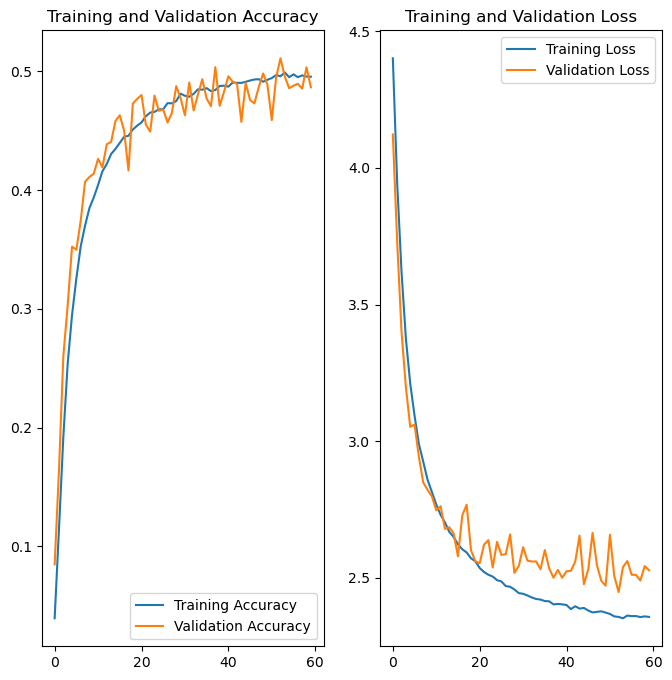

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:


# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Directory containing the original images
input_dir = 'test/'
output_dir = 'test_cropped/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for filename in os.listdir(input_dir):
    # Load the image using PIL
    image_path = os.path.join(input_dir, filename)
    try:
        img = Image.open(image_path)
    except:
        print(f"Error: Unable to load image '{filename}'")
        continue
    
    # Check if the image has the correct number of channels (RGB or RGBA)
    if img.mode != 'RGB':
        img = img.convert('RGB')


    # Convert PIL image to OpenCV format
    img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    # Convert into grayscale
    gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # Check if any faces are detected
    if len(faces) > 0:
        # Take only the first detected face
        x, y, w, h = faces[0]
        # Crop the face
        face = img_cv2[y:y+h, x:x+w]
        # Generate unique output filename
        output_filename = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.jpg")
        # Save the cropped face
        cv2.imwrite(output_filename, face)
    else:
        print(f"No faces detected in '{filename}'")

print("Cropped faces saved successfully.")

In [98]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2

# Directory containing the test images
test_dir ='test_cropped/'

# Get a list of all possible image IDs
all_image_ids = list(range(4977))

# Initialize an empty list to store predictions
predictions = []

# Iterate over each image ID
for image_id in all_image_ids:
    # Load the image if it exists
    img_path = os.path.join(test_dir, f"{image_id}.jpg")
    if os.path.exists(img_path):
        img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create a batch

        # Perform inference
        predictions_prob = model.predict(img_array)
        predicted_class_index = np.argmax(predictions_prob)
        confidence = np.max(predictions_prob) * 100

        # Map predicted class index to category name (Replace this with your actual mapping logic)
        category_name = class_names[predicted_class_index]  # Replace class_names with your actual class names list
    else:
        # If image is missing, assign "Art Carney" as the category
        category_name = "Art Carney"

    # Append image ID and category to the predictions list
    predictions.append({'Id': image_id, 'Category': category_name})

# Find missing IDs and assign "Art Carney" to them
missing_ids = set(all_image_ids) - set([pred['Id'] for pred in predictions])
for missing_id in missing_ids:
    predictions.append({'Id': missing_id, 'Category': "Art Carney"})

# Convert predictions list to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Sort DataFrame based on 'Id' column in ascending order
predictions_df.sort_values(by='Id', inplace=True)

# Save predictions to a CSV file
predictions_df.to_csv('submission7.2.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━